In [55]:
import spacy
import os
import pandas as pd

nlp = spacy.load("fr_core_news_lg")

from spacy.matcher import Matcher

dossier = 'data/genre-motifs-pamphlet'


donnees_par_pattern = {}
result = pd.DataFrame()
for pattern_idx, pattern in enumerate(patterns):

    dicpattern = {}
    
    matcher = Matcher(nlp.vocab)
    matcher.add(f"pattern_{pattern_idx}", [pattern])
    
    donnees_fichier = {}
    
    for fichier, doc in dic.items():

        matches = matcher(doc)
        
        occur_match={}
        for match_id, start, end in matches:
            match_texte = doc[start:end-1].text
            if match_texte not in occur_match.keys():
                occur_match[match_texte]=1
            else:
                occur_match[match_texte]+=1
        
        donnees_fichier[fichier]=occur_match
    
    # Transformez donnees_fichier en un DataFrame
    df = pd.DataFrame.from_dict(donnees_fichier, orient='columns')
    
    result = pd.concat([result, df], ignore_index=False)
    
result = result.fillna(0).T
serie_triee = result.sum().sort_values(ascending=False).items()



In [56]:
result

,de toutes les expériences de,de tous les moyens de,de tous les gens de,de commun les paysans de,de toutes les demandes de,de tous les actes de,de toutes les espèces de,de toutes les intrigues de,de tous les âges de,de tous les navets de,...,rapports des compagnies de chemins,sujet des chemins de fer,causes des accidents de chemins,nistration des chemins de fer,syndic des compagnies de chemins,raison des intérêts de caste,époque des tremblements de terre,recettes des chemins de fer,. Oh ! sans doute,. Oh! sans doute
"pamphlet_Bernanos_La liberté, pour quoi faire.txt",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0
pamphlet_Chirac_Les rois de la République I.txt,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pamphlet_Tailhade_Les Kalendes et les Ides.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pamphlet_Barrès_Une visite à l’armée anglaise.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pamphlet_Bloy_Je m’accuse.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pamphlet_Péguy_L’Argent.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pamphlet_Bernanos_Les Grands Cimetières sous la lune.txt,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
pamphlet_Taxil_Les Pornographes sacrés.txt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pamphlet_Taxil_Les frères Trois-Points.txt,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pamphlet_Barrès_La Grande pitié des églises de France.txt,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
patterns = [
    [{"TEXT": "."}, {"POS": "NOUN"}, {"TEXT": "."}, {"TEXT": "--"}, {"POS": "NOUN"}],
    [{"TEXT": "de"}, {"POS": "ADJ"}, {"TEXT": "les"}, {"POS": "NOUN"}, {"TEXT": "de"}, {"POS": "NOUN"}],
    [{"POS": "NOUN"}, {"TEXT": "de"}, {"POS": "NOUN"}, {"TEXT": "de"}, {"POS": "NOUN"}, {"POS": "VERB"}],
    [{"POS": "NOUN"}, {"TEXT": ","}, {"TEXT": "est"}, {"TEXT": "-"}, {"TEXT": "a"}, {"TEXT": "-"}],
    [{"TEXT": "de"}, {"POS": "NOUN"}, {"TEXT": "ou"}, {"TEXT": "de"}, {"POS": "NOUN"}],
    [{"POS": "NOUN"}, {"POS": "VERB"}, {"TEXT": "les"}, {"POS": "NOUN"}, {"TEXT": "de"}, {"POS": "NOUN"}],
    [{"POS": "VERB"}, {"TEXT": "le"}, {"POS": "NOUN"}, {"TEXT": "des"}, {"POS": "NOUN"}, {"POS": "ADJ"}],
    [{"POS": "NOUN"}, {"TEXT": "."}, {"TEXT": "Nous"}, {"TEXT": "ne"}, {"POS": "VERB"}, {"TEXT": "pas"}],
    [{"POS": "NOUN"}, {"TEXT": "des"}, {"POS": "NOUN"}, {"TEXT": "de"}, {"POS": "NOUN"}, {"TEXT": "de"}],
    [{"TEXT": "."}, {"TEXT": "Oh"}, {"TEXT": "!"}, {"TEXT": "sans"}, {"POS": "NOUN"}, {"TEXT": ","}],
]



In [50]:
import spacy
import os
import pandas as pd

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_lg")

from spacy.matcher import Matcher

def charger_textes(dossier):
    dic = {}
    for fichier in os.listdir(dossier):
        print(fichier)
        chemin_fichier = os.path.join(dossier, fichier)
        
        with open(chemin_fichier, 'r', encoding='utf-8') as file:
            texte = file.read()

        nlp.max_length = len(texte)
        
        doc = nlp(texte)
        dic[fichier] = doc
    
    return dic

dossier = 'data/genre-motifs-pamphlet'
dic = charger_textes(dossier)

pamphlet_Bernanos_La liberté, pour quoi faire.txt
pamphlet_Chirac_Les rois de la République I.txt
pamphlet_Tailhade_Les Kalendes et les Ides.txt
pamphlet_Barrès_Une visite à l’armée anglaise.txt
pamphlet_Bloy_Je m’accuse.txt
pamphlet_Péguy_L’Argent.txt
pamphlet_Bernanos_Les Grands Cimetières sous la lune.txt
pamphlet_Taxil_Les Pornographes sacrés.txt
pamphlet_Taxil_Les frères Trois-Points.txt
pamphlet_Barrès_La Grande pitié des églises de France.txt
pamphlet_Céline_Mea Culpa.txt
pamphlet_Barrès_Scènes Et Doctrines Du Nationalisme.txt
pamphlet_Bernanos_La Grande Peur Des Bien Pensants.txt
pamphlet_Céline_Les beaux draps.txt
pamphlet_Barrès_Les Diverses familles spirituelles de la France.txt
pamphlet_Taxil_La lanterne d’un suspendu.txt
pamphlet_Bernanos_Le crépuscule des vieux.txt
pamphlet_Darien_Les Vrais Sous-Offs.txt
pamphlet_Tailhade_La Noire Idole.txt
pamphlet_Bloy_Un Brelan d’excommuniés.txt
pamphlet_Chirac_L'agiotage sous la troisième république I.txt
pamphlet_Céline_Bagatelles po

In [43]:
def trouver_occurrences(dic, patterns):
    result = pd.DataFrame()

    for pattern_idx, pattern in enumerate(patterns):
        matcher = Matcher(nlp.vocab)
        matcher.add(f"pattern_{pattern_idx}", [pattern])
        
        donnees_fichier = {}
        
        for fichier, doc in dic.items():

            matches = matcher(doc)
            
            occur_match={}
            for match_id, start, end in matches:
                match_texte = doc[start:end-1].text
                match_texte = match_texte.replace("'","e")
                if match_texte not in occur_match.keys():
                    occur_match[match_texte]=1/len(doc)
                else:
                    occur_match[match_texte]+=1/len(doc)
            
            donnees_fichier[fichier] = occur_match
        
        df = pd.DataFrame.from_dict(donnees_fichier, orient='columns')
        result = pd.concat([result, df], ignore_index=False)
    
    return result

# Définir les motifs de recherche
patterns = [
    [{"TEXT": {"in":["je","tu","il","elle","nous","vous","ils","elles"]}}, {"TEXT": {"in": ["me", "m'","te","t'","le","l'","lui","la","nous","vous","les","s'","leurs"]}}, {"POS":"VERB"}],
]

result = trouver_occurrences(dic, patterns)

result = result.fillna(0)

In [44]:
result_ = result.copy().T
result_

,nous nous,il le,il nous,vous les,je le,nous le,vous le,vous me,ils la,je vous,...,tu nous,elle me,elle vous,il te,elles se,je nous,elles la,tu la,nous me,elles te
"pamphlet_Bernanos_La liberté, pour quoi faire.txt",0.000140,0.000035,0.000151,0.000023,0.000186,0.000047,0.000209,0.000035,0.000023,0.000302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
pamphlet_Chirac_Les rois de la République I.txt,0.000009,0.000107,0.000000,0.000009,0.000098,0.000009,0.000009,0.000018,0.000000,0.000134,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
essai_Bloy_Le Sang du pauvre.txt,0.000000,0.000115,0.000000,0.000000,0.000058,0.000000,0.000144,0.000029,0.000000,0.000086,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
essai_Péguy_Note sur M. Bergson et la philosophie bergsonienne.txt,0.000029,0.000029,0.000086,0.000029,0.000038,0.000048,0.000038,0.000010,0.000000,0.000029,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
essai_Daudet_Les Œuvres dans les hommes.txt,0.000039,0.000104,0.000052,0.000000,0.000052,0.000013,0.000013,0.000013,0.000000,0.000039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
roman_Barrès_La Colline inspirée.txt,0.000030,0.000100,0.000080,0.000010,0.000010,0.000010,0.000050,0.000010,0.000010,0.000139,...,0.000000,0.000010,0.000020,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
pamphlet_Chirac_Les pots de vin parlementaires.txt,0.000089,0.000000,0.000000,0.000000,0.000268,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
roman_Céline_Voyage au bout de la nuit.txt,0.000098,0.000053,0.000115,0.000040,0.000222,0.000018,0.000173,0.000035,0.000013,0.000124,...,0.000004,0.000324,0.000027,0.000018,0.000009,0.0,0.0,0.000009,0.000004,0.000004
essai_Daudet_Bréviaire du journalisme.txt,0.000056,0.000070,0.000014,0.000000,0.000042,0.000000,0.000000,0.000014,0.000014,0.000028,...,0.000000,0.000014,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [45]:
def extraire_genre(fichier):
    # Fonction pour extraire le genre à partir du nom du fichier
    return fichier.split('_')[0]

result_['Genre'] = result_.index.map(extraire_genre)
# Grouper par genre et calculer la moyenne
moyenne_par_genre = result_.groupby('Genre').mean()

# Afficher le DataFrame avec les moyennes par genre

moyenne_par_genre = moyenne_par_genre.drop('.~lock.pamphlet',axis=0)
moyenne_par_genre

,nous nous,il le,il nous,vous les,je le,nous le,vous le,vous me,ils la,je vous,...,tu nous,elle me,elle vous,il te,elles se,je nous,elles la,tu la,nous me,elles te
Genre,,,,,,,,,,,,,,,,,,,,,
essai,0.000032,0.000058,0.000028,0.000006,0.000087,0.000042,0.000065,0.000032,0.000007,0.000120,...,5.022618e-07,0.000006,6.679585e-07,0.000007,0.000002,3.365086e-07,4.944699e-07,2.546477e-07,0.000000e+00,0.000000e+00
pamphlet,0.000055,0.000043,0.000039,0.000012,0.000086,0.000037,0.000046,0.000027,0.000008,0.000098,...,5.390605e-07,0.000013,4.768280e-06,0.000002,0.000001,4.973224e-07,8.832062e-08,0.000000e+00,0.000000e+00,1.417330e-07
roman,0.000068,0.000057,0.000107,0.000019,0.000117,0.000021,0.000069,0.000072,0.000007,0.000246,...,3.652284e-06,0.000091,1.005130e-05,0.000012,0.000003,2.439091e-06,1.236046e-07,1.489458e-06,1.567845e-07,7.037346e-08


In [46]:
moyenne_par_genre.T.sort_values(by='pamphlet', ascending=False).T


,je me,je vous,je le,il se,il me,nous nous,vous le,il lui,il le,vous vous,...,elle te,tu nous,je nous,tu le,tu les,tu lui,elles te,elles la,tu la,nous me
Genre,,,,,,,,,,,,,,,,,,,,,
essai,0.000124,0.000120,0.000087,0.000060,0.000081,0.000032,0.000065,0.000070,0.000058,0.000014,...,3.418748e-07,5.022618e-07,3.365086e-07,1.422509e-06,7.477250e-07,7.778905e-07,0.000000e+00,4.944699e-07,2.546477e-07,0.000000e+00
pamphlet,0.000171,0.000098,0.000086,0.000070,0.000068,0.000055,0.000046,0.000043,0.000043,0.000042,...,6.104060e-07,5.390605e-07,4.973224e-07,3.964922e-07,3.234526e-07,1.646227e-07,1.417330e-07,8.832062e-08,0.000000e+00,0.000000e+00
roman,0.000419,0.000246,0.000117,0.000051,0.000276,0.000068,0.000069,0.000086,0.000057,0.000050,...,1.984958e-06,3.652284e-06,2.439091e-06,1.065792e-05,2.439921e-06,4.608454e-06,7.037346e-08,1.236046e-07,1.489458e-06,1.567845e-07


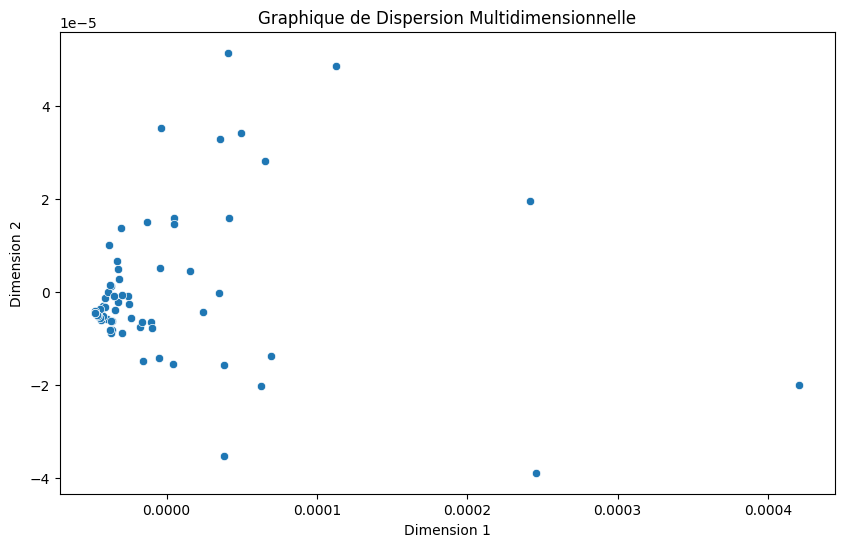

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # Pour l'ACP, par exemple

df = moyenne_par_genre.copy().T
# Supprimer les colonnes non numériques si nécessaire
df = df.select_dtypes(include=['float64', 'int64'])

# Réduction de dimension (exemple avec l'ACP)
n_dimensions = 2  # Vous pouvez ajuster le nombre de dimensions souhaité
pca = PCA(n_components=n_dimensions)
df_reduced = pca.fit_transform(df)

# Créer un nouveau dataframe avec les composantes principales
df_reduced = pd.DataFrame(data=df_reduced, columns=['Dimension 1', 'Dimension 2'])

# Tracer le graphique de dispersion multidimensionnelle
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', data=df_reduced)
plt.title('Graphique de Dispersion Multidimensionnelle')
plt.show()

In [ ]:
import spacy
import os
import pandas as pd

# Charger le modèle spaCy
nlp = spacy.load("fr_core_news_lg")

from spacy.matcher import Matcher

# Définir les motifs de recherche
patterns = [
    [{"TEXT": {"in":["je","tu","il","elle","nous","vous","ils","elles"]}}, {"TEXT": {"in": ["me", "m'","te","t'","le","lui","la","nous","vous","les","leurs"]}}, {"POS":"VERB"}],
]

# Répertoire contenant les fichiers à traiter
dossier = 'data/genre-motifs-pamphlet'

# Dictionnaire pour stocker les textes analysés
dic = {}
for fichier in os.listdir(dossier):
    chemin_fichier = os.path.join(dossier, fichier)
    
    with open(chemin_fichier, 'r', encoding='utf-8') as file:
        texte = file.read()

    nlp.max_length = len(texte)
    
    doc = nlp(texte)
    dic[fichier] = doc

# Dictionnaire pour stocker les données par motif
donnees_par_pattern = {}
result = pd.DataFrame()

# Boucle sur les motifs de recherche
for pattern_idx, pattern in enumerate(patterns):

    dicpattern = {}
    
    matcher = Matcher(nlp.vocab)
    matcher.add(f"pattern_{pattern_idx}", [pattern])
    
    donnees_fichier = {}
    
    # Boucle sur les fichiers
    for fichier, doc in dic.items():

        matches = matcher(doc)
        
        occur_match={}
        for match_id, start, end in matches:
            match_texte = doc[start:end-1].text
            if match_texte not in occur_match.keys():
                occur_match[match_texte]=1
            else:
                occur_match[match_texte]+=1
        
        donnees_fichier[fichier] = occur_match
    
    # Transformez donnees_fichier en un DataFrame
    df = pd.DataFrame.from_dict(donnees_fichier, orient='columns')
    
    # Concaténez le DataFrame au résultat global
    result = pd.concat([result, df], ignore_index=False)

# Remplacez les NaN par 0 et transposez le DataFrame
result = result.fillna(0).T

# Triez la série par ordre décroissant
serie_triee = result.sum().sort_values(ascending=False)

# Imprimez l'index et la valeur triés
for index, value in serie_triee.items():
    print(index, value)


In [ ]:
patterns = [
    [{"TEXT": "je"}, {"TEXT": {"in": ["te", "t'"]}}],
    [{"TEXT": "tu"}, {"TEXT": {"in": ["te", "t'"]}}],
    [{"TEXT": {"in": ['il','elle']}}, {"TEXT": {"in": ["te", "t'"]}}],
    [{"TEXT": "nous"}, {"TEXT": {"in": ["te", "t'"]}}],
    [{"TEXT": "vous"}, {"TEXT": {"in": ["te", "t'"]}}],
    [{"TEXT": {"in": ['ils','elles']}}, {"TEXT": {"in": ["te", "t'"]}}],
]

In [ ]:
patterns = [
    [{"TEXT": "je"}, {"TEXT": "lui"}],
    [{"TEXT": "tu"}, {"TEXT": "lui"}],
    [{"TEXT": "il"}, {"TEXT": "lui"}],
    [{"TEXT": "nous"}, {"TEXT": "te"}],
    [{"TEXT": "vous"}, {"TEXT": "te"}],
    [{"TEXT": "ils"}, {"TEXT": "te"}],
    [{"TEXT": "je"}, {"TEXT": "t'"}],
    [{"TEXT": "tu"}, {"TEXT": "t'"}],
    [{"TEXT": "il"}, {"TEXT": "t'"}],
    [{"TEXT": "nous"}, {"TEXT": "t'"}],
    [{"TEXT": "vous"}, {"TEXT": "t'"}],
    [{"TEXT": "ils"}, {"TEXT": "t'"}],
    ]

In [127]:

donnees_par_pattern = {}
result = pd.DataFrame()
for pattern_idx, pattern in enumerate(patterns):

    dicpattern = {}
    
    matcher = Matcher(nlp.vocab)
    matcher.add(f"pattern_{pattern_idx}", [pattern])
    
    donnees_fichier = {}
    
    for fichier, doc in dic.items():

        matches = matcher(doc)
        
        occur_match={}
        for match_id, start, end in matches:
            match_texte = doc[start:end-1].text
            if match_texte not in occur_match.keys():
                occur_match[match_texte]=1
            else:
                occur_match[match_texte]+=1
        
        donnees_fichier[fichier]=occur_match
    
    # Transformez donnees_fichier en un DataFrame
    df = pd.DataFrame.from_dict(donnees_fichier, orient='columns')
    
    result = pd.concat([result, df], ignore_index=False)
    
result = result.fillna(0).T

for val , a in result.sum().sort_values(ascending=False).items():
    print(val, a)

je me 563.0
je vous 433.0
je le 253.0
il me 251.0
nous nous 193.0
vous le 187.0
il lui 184.0
vous vous 175.0
il le 142.0
il nous 135.0
il vous 117.0
nous le 111.0
ils le 105.0
je les 104.0
il les 100.0
je lui 97.0
vous me 92.0
ils nous 74.0
je m' 73.0
nous les 68.0
il la 64.0
elle nous 62.0
je te 61.0
ils me 59.0
elle le 50.0
vous les 50.0
ils vous 49.0
je la 48.0
ils les 45.0
elle les 45.0
vous la 42.0
nous la 40.0
ils la 39.0
vous lui 38.0
elle lui 33.0
elle me 29.0
ils lui 28.0
nous vous 27.0
vous nous 21.0
elles nous 19.0
elle vous 18.0
nous lui 17.0
elle la 16.0
tu te 16.0
il m' 14.0
elles le 11.0
nous te 10.0
il te 9.0
tu me 9.0
ils te 8.0
elles les 7.0
elles me 7.0
elles lui 6.0
elle m' 5.0
je t' 5.0
tu nous 5.0
vous m' 4.0
tu m' 4.0
elles vous 3.0
tu les 2.0
tu le 2.0
je nous 2.0
elle te 2.0
tu lui 2.0
nous t' 1.0
tu t' 1.0
elles te 1.0
elles la 1.0


In [93]:
for a,b in donnees_par_pattern.items():
    print(a)
    display(b)
    

In [54]:
for a,b in donnees_par_pattern.items():
    print(a)
    display(b)
    

Pattern 1


{'. Oh! sans doute,': 'pamphlet_Chirac_Les pots de vin parlementaires.txt'}

Pattern 2


{'de toutes les expériences de laboratoire': 'pamphlet_Bernanos_La liberté, pour quoi faire.txt',
 'de tous les gens de finance': 'pamphlet_Péguy_L’Argent.txt',
 'de commun les paysans de M.': 'pamphlet_Taxil_Les Pornographes sacrés.txt',
 'de tous les actes de bienfaisance': 'pamphlet_Taxil_Les frères Trois-Points.txt',
 'de toutes les espèces de monuments': 'pamphlet_Céline_Mea Culpa.txt',
 'de toutes les intrigues de partis': "pamphlet_Chirac_L'agiotage sous la troisième république I.txt",
 'de toutes les places de commandement': 'pamphlet_Céline_Bagatelles pour un massacre.txt',
 'de tous les services de trésorerie': 'pamphlet_Bernanos_Où allons-nous.txt',
 'de toutes les Chambres de députés': "pamphlet_Chirac_L'agiotage sous la troisième république II.txt",
 'de tous les droits de consommation': 'pamphlet_Tailhade_À Travers les Grouins.txt',
 'de tous les conducteurs de peuples': "pamphlet_Bernanos_La révolte de l'esprit.txt",
 'de tous les instruments de torture': 'pamphlet_Tailh

Pattern 3


{'de toutes les sortes de chiens': 'pamphlet_Péguy_L’Argent.txt',
 'stock de conserves de saumon refusé': 'pamphlet_Taxil_Les Pornographes sacrés.txt',
 'cas de demande de secours formulée': 'pamphlet_Taxil_Les frères Trois-Points.txt',
 'entrepreneur de travaux de maçonnerie muni': 'pamphlet_Céline_Mea Culpa.txt',
 'millions de marks de pensions servies': 'pamphlet_Barrès_Scènes Et Doctrines Du Nationalisme.txt',
 'ligne de chemin de fer allant': 'pamphlet_Taxil_La lanterne d’un suspendu.txt',
 'coin de champ de betteraves confié': 'pamphlet_Taxil_À bas la calotte.txt',
 'suite de textes de combat composés': 'pamphlet_Bernanos_Où allons-nous.txt',
 'tarifs de chemins de fer présentaient': 'pamphlet_Chirac_Les rois de la République II.txt',
 'qualité de bête de somme semble': 'pamphlet_Bernanos_Les enfants humiliés .txt',
 'volée de coups de fusils salua': 'pamphlet_Chirac_Les pots de vin parlementaires.txt'}

Pattern 4


{'volée de coups de fusils salua': 'pamphlet_Chirac_Les pots de vin parlementaires.txt'}

Pattern 5


{'de système ou de parti': 'pamphlet_Bernanos_La liberté, pour quoi faire.txt',
 'de hausse ou de baisse': 'pamphlet_Chirac_Les rois de la République I.txt',
 'de tour ou de collection': 'pamphlet_Barrès_Une visite à l’armée anglaise.txt',
 'de banditisme ou de forfaiture': 'pamphlet_Bloy_Je m’accuse.txt',
 'de vie ou de mort': 'pamphlet_Darien_La Belle France.txt',
 'de traîtres ou de lâches': 'pamphlet_Bernanos_Les Grands Cimetières sous la lune.txt',
 'de fête ou de dimanche': 'pamphlet_Taxil_Les Pornographes sacrés.txt',
 'de régénération ou de destruction': 'pamphlet_Taxil_Les frères Trois-Points.txt',
 'de monuments ou de ruines': 'pamphlet_Céline_Mea Culpa.txt',
 'de crainte ou de scrupules': 'pamphlet_Barrès_Scènes Et Doctrines Du Nationalisme.txt',
 'de variole ou de choléra': 'pamphlet_Céline_Les beaux draps.txt',
 'de chefs ou de camarades': 'pamphlet_Barrès_Les Diverses familles spirituelles de la France.txt',
 'de croix ou de fleur': 'pamphlet_Taxil_La lanterne d’un suspen

Pattern 6


{'de ministre ou de rapporteur': 'pamphlet_Péguy_L’Argent.txt',
 'année courir les réunions de propagande': 'pamphlet_Taxil_Les Pornographes sacrés.txt',
 'lesquels enseignent les pratiques de sorcellerie': 'pamphlet_Taxil_Les frères Trois-Points.txt',
 'parvis défendant les églises de villages': 'pamphlet_Céline_Mea Culpa.txt',
 'partis acceptent les idées de décentralisation': 'pamphlet_Barrès_Scènes Et Doctrines Du Nationalisme.txt',
 'rapports signalaient les habitudes de jeu': 'pamphlet_Bloy_Un Brelan d’excommuniés.txt',
 'recherches concernant les logiciels de traduction': 'pamphlet_Chirac_Erreur commise au préjudice du Trésor français.txt',
 'projet concernant les compagnies de chemins': 'pamphlet_Bernanos_Où allons-nous.txt',
 'intellectuels lisaient les professions de foi': 'pamphlet_Bloy_Propos d’un entrepreneur de démolitions.txt',
 'vivisecteurs traitent les animaux de laboratoire': 'pamphlet_Bernanos_Le Chemin de la Croix-des-âmes.txt',
 'homme recevant les ordres de M.': 

Pattern 7


{'empêcher le développement des sciences physiques': 'pamphlet_Bernanos_La liberté, pour quoi faire.txt',
 'Voici le commencement des Compagnies fermières': 'pamphlet_Chirac_Les rois de la République I.txt',
 'Voici le cortège des folies contemporaines': 'pamphlet_Tailhade_Les Kalendes et les Ides.txt',
 'faire le portrait des hommes supérieurs': 'pamphlet_Péguy_L’Argent.txt',
 'préférer le Jardin des âmes pieuses': 'pamphlet_Bernanos_Les Grands Cimetières sous la lune.txt',
 'prononcer le nom des parties pudiques': 'pamphlet_Taxil_Les Pornographes sacrés.txt',
 'fait le succès des mystères anciens': 'pamphlet_Taxil_Les frères Trois-Points.txt',
 'faire le discernement des évêques orthodoxes': 'pamphlet_Céline_Mea Culpa.txt',
 'taxer le travail des ouvriers étrangers': 'pamphlet_Barrès_Scènes Et Doctrines Du Nationalisme.txt',
 'regarde le ministère des Affaires étrangères': 'pamphlet_Céline_Les beaux draps.txt',
 'entends le cri des mystères antiques': 'pamphlet_Taxil_La lanterne d’un

Pattern 8


{'sourire le porte-parole des négateurs allemands': 'pamphlet_Bloy_Je m’accuse.txt',
 'tions. Nous ne voulons pas': 'pamphlet_Péguy_L’Argent.txt',
 'Église. Nous ne renions pas': 'pamphlet_Taxil_Les Pornographes sacrés.txt',
 'voile. Nous ne sommes pas': 'pamphlet_Taxil_Les frères Trois-Points.txt',
 'horizon. Nous ne suffisions pas': 'pamphlet_Céline_Mea Culpa.txt',
 'affirmation. Nous ne démentirons pas': 'pamphlet_Barrès_Scènes Et Doctrines Du Nationalisme.txt',
 'risque. Nous ne disons pas': 'pamphlet_Céline_Les beaux draps.txt',
 'suite. Nous ne connaissons pas': 'pamphlet_Taxil_La lanterne d’un suspendu.txt',
 'importance. Nous ne méprisons pas': 'pamphlet_Taxil_À bas la calotte.txt',
 'consciences. Nous ne demandons pas': 'pamphlet_Tailhade_À Travers les Grouins.txt',
 'paix. Nous ne pouvons pas': 'pamphlet_Bernanos_Scandale de la vérité.txt',
 'change. Nous ne voulons pas': "pamphlet_Vallès_L'argent.txt",
 'mensonges. Nous ne croyons pas': 'pamphlet_Bloy_Propos d’un entrepreneu

Pattern 9


{'Apennins. Nous ne pouvons pas': 'pamphlet_Péguy_L’Argent.txt',
 'commande des services de propagande de': 'pamphlet_Taxil_Les Pornographes sacrés.txt',
 'exportation des Chemins de fer de': 'pamphlet_Céline_Mea Culpa.txt',
 'cintre des milliers de couronnes de': 'pamphlet_Céline_Les beaux draps.txt',
 'Analyse des récita de guerre de': 'pamphlet_Taxil_La lanterne d’un suspendu.txt',
 'association des joueurs de boules de': 'pamphlet_Bloy_Un Brelan d’excommuniés.txt',
 'compagnie des chemins de fer de': 'pamphlet_Bernanos_Où allons-nous.txt',
 'pagnie des chemins de fer de': 'pamphlet_Bernanos_Scandale de la vérité.txt',
 'actions des Compagnies de chemins de': "pamphlet_Vallès_L'argent.txt",
 'usurpation des moyens de diffusion de': "pamphlet_Bernanos_La révolte de l'esprit.txt",
 'énoncé des cours de philosophie de': 'pamphlet_Tailhade_Au pays du Mufle.txt',
 'syndic des compagnies de chemins de': 'pamphlet_Chirac_Les rois de la République II.txt',
 'raison des intérêts de caste de'

Pattern 10


{'. Oh ! sans doute,': 'pamphlet_Bloy_Exégèse des lieux communs.txt',
 '. Oh! sans doute,': 'pamphlet_Chirac_Les pots de vin parlementaires.txt'}